In [1]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('Amazon_Products.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_4780\1787674596.py:3: DtypeWarning: Columns (5,6,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

# Dealing will null values and delecting unncessary columns 

In [2]:
df.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,...,Unnamed: 885,Unnamed: 886,Unnamed: 887,Unnamed: 888,Unnamed: 889,Unnamed: 890,Unnamed: 891,Unnamed: 892,Unnamed: 893,Unnamed: 894
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Droping Null Values

In [3]:
df.columns.unique()

Index(['uniq_id', 'product_name', 'manufacturer', 'price',
       'number_available_in_stock', 'number_of_reviews',
       'number_of_answered_questions', 'average_review_rating',
       'amazon_category_and_sub_category', 'description',
       ...
       'Unnamed: 885', 'Unnamed: 886', 'Unnamed: 887', 'Unnamed: 888',
       'Unnamed: 889', 'Unnamed: 890', 'Unnamed: 891', 'Unnamed: 892',
       'Unnamed: 893', 'Unnamed: 894'],
      dtype='object', length=895)

In [4]:
df.isna().sum().head(20)

uniq_id                                            2
product_name                                       2
manufacturer                                       9
price                                           1437
number_available_in_stock                       2502
number_of_reviews                                 20
number_of_answered_questions                     767
average_review_rating                             20
amazon_category_and_sub_category                 692
description                                      653
product_information                               61
product_description                              654
items_customers_buy_after_viewing_this_item     3068
customer_questions_and_answers                  9089
Unnamed: 14                                    10002
Unnamed: 15                                    10002
Unnamed: 16                                    10002
Unnamed: 17                                    10002
Unnamed: 18                                   

In [5]:
df['Unnamed: 894'].unique()

array([nan,
       '{"seller"=>[{"Seller_name_1"=>"gifttogadget", "Seller_price_1"=>"£154.99"}, {"Seller_name_2"=>"Cook N\' Book International (ONO - MAKE US AN OFFER)", "Seller_price_2"=>"£289.00"}]}'],
      dtype=object)

In [6]:
import numpy as np
df['Unnamed: 894'].replace('{"seller"=>[{"Seller_name_1"=>"gifttogadget", "Seller_price_1"=>"£154.99"}, {"Seller_name_2"=>"Cook N\' Book International (ONO - MAKE US AN OFFER)", "Seller_price_2"=>"£289.00"}]}',np.nan)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
9999    NaN
10000   NaN
10001   NaN
10002   NaN
10003   NaN
Name: Unnamed: 894, Length: 10004, dtype: float64

In [7]:
#each of the columns from 14 to 894 has one or two elements that are not rest all are Nan value hence we need to remove these

In [8]:
for i in range(15,895):
    column_name='Unnamed: {}'.format(i)
    List=df[column_name].unique()
    for i in range(1,len(List)):
        df[column_name].replace(List[i],np.nan,inplace=True)

In [9]:
df.dropna(axis='columns',how='all',inplace=True)
df.drop(axis='column',columns=['Unnamed: 14'],inplace=True)

In [10]:
df.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...


In [11]:
df['price'].astype(str)
df.isna().sum()

uniq_id                                           2
product_name                                      2
manufacturer                                      9
price                                          1437
number_available_in_stock                      2502
number_of_reviews                                20
number_of_answered_questions                    767
average_review_rating                            20
amazon_category_and_sub_category                692
description                                     653
product_information                              61
product_description                             654
items_customers_buy_after_viewing_this_item    3068
customer_questions_and_answers                 9089
dtype: int64

# Converting Price into Suitable Float data Type

In [12]:
df['price'].str.contains('£').sum()
type (df['price'])

pandas.core.series.Series

In [13]:
df.loc[2003,['price']]='0'
df.loc[2005,['price']]='0'

In [14]:
df['price']=df['price'].str.replace(',','')

In [15]:
df['price'].str.contains(',').sum() 

0

In [16]:
flit=df['price'].str.contains('-')==True
df['temp']=df.loc[flit,['price']]
df[['lower','upper']]=df['temp'].str.split('-',expand=True)

In [17]:
df.head(2)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,temp,lower,upper
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,NaN,NaN,NaN
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,NaN,NaN,NaN


In [18]:
df['lower']=df['lower'].str.strip('£')
df['upper']=df['upper'].str.strip('£')

In [19]:
df['lower']=df['lower'].astype(float)

In [20]:
df.loc[1655,['lower']]

lower    269.0
Name: 1655, dtype: object

In [21]:
df.loc[1655,['upper']]

upper     £699.99
Name: 1655, dtype: object

In [22]:
df['upper'].str.contains('£').sum()

18

In [23]:
df['temp']=df['lower']
flit=df['price'].str.contains('-')==True
df.loc[flit,['price']]=df['temp']
df['price']=df['price'].str.strip('£')

In [24]:
df['price'][0:2]

0     3.42
1    16.99
Name: price, dtype: object

In [25]:
df.loc[2003,['price']]
#just rechecking weather at string place it is converted to 0 or not

price    0
Name: 2003, dtype: object

In [26]:
df['price']=df['price'].astype(float)
df['price'].replace(0,np.nan)

0         3.42
1        16.99
2         9.99
3        39.99
4        32.19
         ...  
9999     22.95
10000    39.99
10001    43.99
10002    49.81
10003    21.20
Name: price, Length: 10004, dtype: float64

In [27]:
df['price'].median()

10.56

In [28]:
df['price'].describe()

count    8549.000000
mean       20.246669
std        46.310067
min         0.000000
25%         4.980000
50%        10.560000
75%        19.990000
max      2439.920000
Name: price, dtype: float64

# Converting number_available in Suilable data type for calculations/Plotting Types of Product

In [29]:
df['number_available_in_stock'].unique()

array(['5\xa0new', nan, '2\xa0new', '3\xa0new', '4\xa0new', '1\xa0new',
       '6\xa0new', '18\xa0new', '12\xa0new', '1\xa0used', '26\xa0new',
       '37\xa0new', '35\xa0new', '22\xa0new', '11\xa0new', '16\xa0new',
       '31\xa0new', '9\xa0new', '29\xa0new', '33\xa0new', '7\xa0new',
       '15\xa0new', '13\xa0new', '19\xa0new', '27\xa0new', '10\xa0new',
       '39\xa0new', '23\xa0new', '38\xa0new', '8\xa0new', '17\xa0new',
       '34\xa0new', '30\xa0new', '21\xa0new', '14\xa0new', '32\xa0new',
       '3\xa0used', '20\xa0new', '43\xa0new', '25\xa0new', '24\xa0new',
       '8\xa0used', '7\xa0used', '41\xa0new', '47\xa0new', '73\xa0new',
       '58\xa0new', '49\xa0new', '36\xa0new', '72\xa0new',
       '1\xa0collectible', '40\xa0new', '1\xa0refurbished', '28\xa0new',
       '2\xa0used', '6\xa0used', 'text"":""Appstore for Android""',
       '69\xa0new', '44\xa0new', '55\xa0new', '56\xa0new', '52\xa0new',
       '71\xa0new', '86\xa0new', '60\xa0new', '92\xa0new', '65\xa0new',
       '74\x

In [30]:
a=df['number_available_in_stock'].str.contains('new').sum()
b=df['number_available_in_stock'].str.contains('used').sum()
c=df['number_available_in_stock'].str.contains('furbish').sum()
d=df['number_available_in_stock'].str.contains('collectibl').sum()
e=df['number_available_in_stock'].str.contains('xt"":""Appstore for Android"" ').sum()


In [31]:
from  matplotlib import pyplot as plt
%matplotlib inline


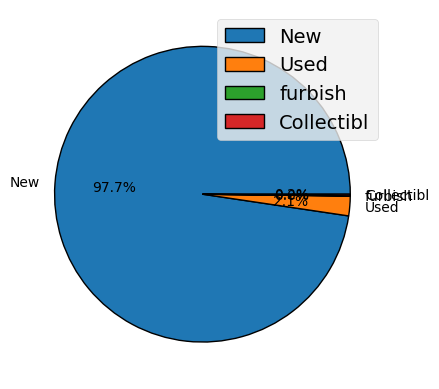

In [32]:
plt.pie([a,b,c,d],autopct='%1.1f%%',labels=['New','Used','furbish','Collectibl'],wedgeprops={'edgecolor':'black'})
plt.style.use('fivethirtyeight')
plt.legend(loc='upper right')

# Availablity of furbish and collectibl is less than 1 percent

In [33]:
df['number_availble_in_stock']=df['number_available_in_stock'].fillna('0')
df['number_available_in_stock']=df['number_available_in_stock'].str.strip('\xa0new')
df['number_available_in_stock']=df['number_available_in_stock'].str.strip('\xa0used')
df['number_available_in_stock']=df['number_available_in_stock'].str.strip('\xa0collectibl')
df['number_available_in_stock']=df['number_available_in_stock'].str.strip('\xa0refurbish')
df['number_available_in_stock']=df['number_available_in_stock'].str.replace('xt"":""Appstore for Android""','1')

In [34]:
df['number_available_in_stock']=df['number_available_in_stock'].astype(float)

# Manufacture vs No.of sold Items

In [35]:
manufacture=df.groupby(['manufacturer'])

In [36]:

#number of products of Disney
manufacture['number_available_in_stock'].value_counts().loc['Disney'].sum()

150

In [37]:
List=df['manufacturer'].unique()

In [38]:
df['number_available_in_stock']
df['numer_available_in_stock']=df['number_available_in_stock'].fillna(0,inplace=True)
  
   

In [39]:
df['number_availble_in_stock']=df['number_available_in_stock'].astype(float)

In [40]:
df['manufacturer']  
df['manufacturer'].isna().sum()    
    

9

In [41]:
df['manufacturer'].fillna('Unknown',inplace=True)
manufacture=df.groupby(['manufacturer'])

In [42]:
List=df['manufacturer'].unique()
Name=[]
for i in List:
    Name.append(i)
Name[0]    
    
    

'Hornby'

In [43]:
Number_Items=[]
for i in List:
    name=manufacture['number_available_in_stock'].value_counts().loc[i].sum()
    Number_Items.append(name)

In [44]:
print(manufacture['number_available_in_stock'].value_counts().loc['Disney'].sum())
Number_Items[0]

167


87

In [45]:
Sold_Items=pd.DataFrame({'Manufacturer':List,'Sold_Items':Number_Items})
Sold_Items.head(5)

,Manufacturer,Sold_Items
0,Hornby,87
1,FunkyBuys,2
2,ccf,1
3,Generic,43
4,Chuggington,14


In [46]:
print(manufacture['number_available_in_stock'].value_counts().loc['Hornby'].sum())
#number of stocks of hornby sold

87


In [47]:
Sold_Items.describe()

,Sold_Items
count,2652.000000
mean,3.772247
std,10.316976
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,171.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


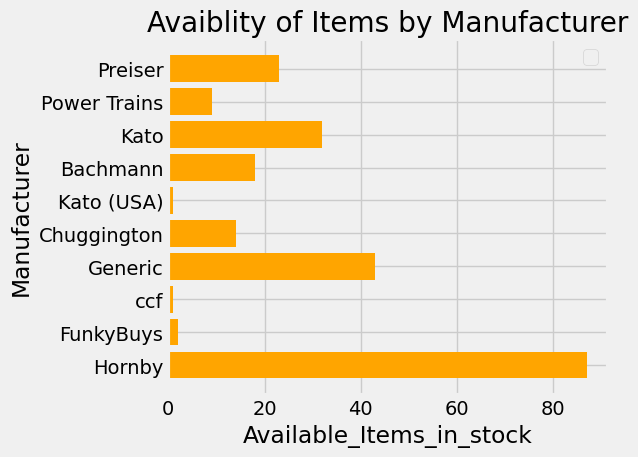

In [48]:
plt.barh(Sold_Items['Manufacturer'][:10],Sold_Items['Sold_Items'][:10],linewidth=1,color='orange')
plt.title('Avaiblity of Items by Manufacturer')
plt.xlabel('Available_Items_in_stock')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.legend()
# item sold by top 10 companies in dataframe

<Figure size 600x2000 with 0 Axes>

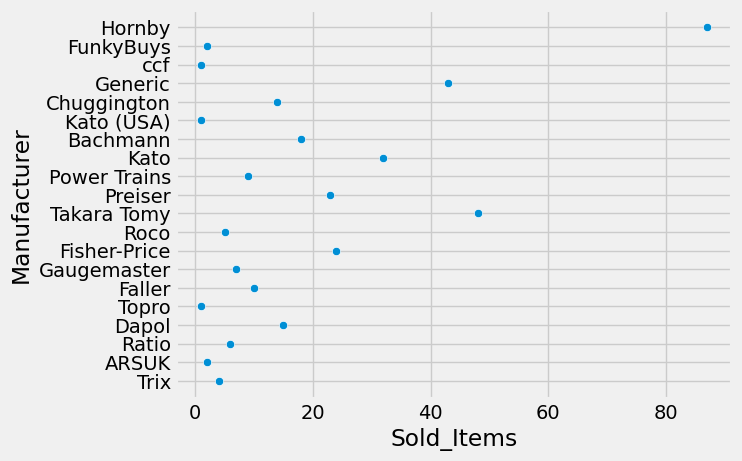

<Figure size 600x2000 with 0 Axes>

In [49]:
x=Sold_Items.head(20)
sns.scatterplot(y='Manufacturer',x='Sold_Items',data=x)
plt.figure(figsize=(6,20))
#Distribution of number of poducts with 20 manufacturer 

# Manufacture vs Average Ratings

In [50]:
df[['Rating','Waste']]=df['average_review_rating'].str.split('out',expand=True)
df.drop(columns=['Waste'],inplace=True)
df['Rating'].unique()

array(['4.9 ', '4.5 ', '3.9 ', '5.0 ', '4.7 ', '4.3 ', '4.8 ', '4.0 ',
       '4.2 ', '4.6 ', '4.1 ', nan, '4.4 ', '3.5 ', '3.0 ',
       '{""text"":""Amazon Cloud Drive""', '3.3 ', '3.7 ', '3.8 ', '3.6 ',
       '2.3 '], dtype=object)

In [51]:
df['Rating']=df['Rating'].replace( '{""text"":""Amazon Cloud Drive""','0')
df['Rating']=df['Rating'].fillna('0')

In [52]:
df['Rating']=df['Rating'].astype(float)

In [53]:
a=dict(manufacture['Rating'].value_counts().loc['Hornby'])
a


{5.0: 44,
 4.0: 10,
 4.8: 6,
 4.2: 5,
 4.3: 5,
 4.4: 5,
 4.6: 5,
 4.5: 2,
 4.7: 2,
 4.9: 2,
 4.1: 1}

In [54]:
sum=0
deno=0
for i,n in a.items():
    sum=sum+float(i)*int(n)
    deno=deno+n
print(sum/deno)    
#average rating of disney product    
   

4.696551724137931


In [55]:
Avg_Rating_List=[]
for i in List:
    a=dict(manufacture['Rating'].value_counts().loc[i])
    #print(a)       
    sum=0
    deno=0
    for j,n in a.items():
        sum=sum+(float(j)*int(n))
        deno=deno+n
    #print(sum)
    #print(deno)
    temp=sum/deno
    Avg_Rating_List.append(temp)    
    

In [56]:
Avg_Rating_List[0]

4.696551724137931

In [57]:
Rating_Manufacturer=pd.DataFrame({'Manufacture':List,'Average Ratings of Manufacuturer':Avg_Rating_List})

In [58]:
Rating_Manufacturer.head(5)

,Manufacture,Average Ratings of Manufacuturer
0,Hornby,4.696552
1,FunkyBuys,4.300000
2,ccf,3.900000
3,Generic,4.681395
4,Chuggington,4.628571


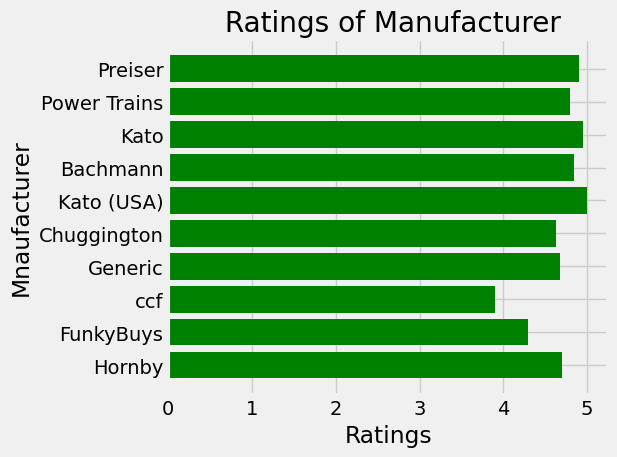

In [59]:
plt.barh(Rating_Manufacturer['Manufacture'][:10],Rating_Manufacturer['Average Ratings of Manufacuturer'][:10],linewidth=1,color='green')
plt.title(' Ratings of Manufacturer')
plt.xlabel('Ratings')
plt.ylabel('Mnaufacturer')
plt.tight_layout()
# Ratings by top 10 companies in dataframe

<Axes: >

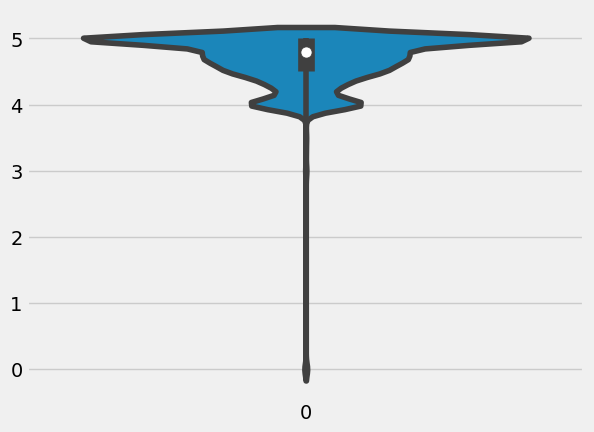

In [60]:
x=Rating_Manufacturer
sns.violinplot(x['Average Ratings of Manufacuturer'])
#Distribution of average Ratings

In [61]:
Rating_Manufacturer['Average Ratings of Manufacuturer'].describe()

count    2652.000000
mean        4.682717
std         0.416415
min         0.000000
25%         4.500000
50%         4.800000
75%         5.000000
max         5.000000
Name: Average Ratings of Manufacuturer, dtype: float64

# Manufacture vs Range of price of Items sold by Manufacturer

In [62]:
Max=[]
Min=[]
for i in List:
    a=manufacture['price'].max().loc[i]
    b=manufacture['price'].min().loc[i]
    Max.append(a)
    Min.append(b)

In [63]:
Range_Manufacturer=pd.DataFrame({'Manufacture':List,'Max':Max,'Min':Min})
Range_Manufacturer.head(5)

,Manufacture,Max,Min
0,Hornby,235.58,2.35
1,FunkyBuys,16.99,5.99
2,ccf,9.99,9.99
3,Generic,33.90,0.86
4,Chuggington,11.95,4.75


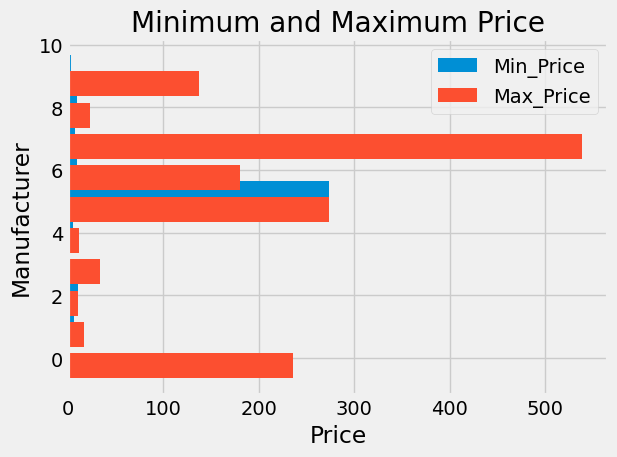

In [64]:
width=0.25
Range_Manufacturer['Min'].astype(float)
Range_Manufacturer['Max'].astype(float)
x_indexes=np.arange(len(Range_Manufacturer['Manufacture'][:10]))
plt.barh(x_indexes+width,Range_Manufacturer['Min'][:10],label='Min_Price')
plt.barh(x_indexes-width,Range_Manufacturer['Max'][:10],label='Max_Price')
plt.title('Minimum and Maximum Price')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.legend()
plt.tight_layout()
# Ratings by top 10 companies in dataframe
#0,10 in y axis represnt the company number in data frame

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


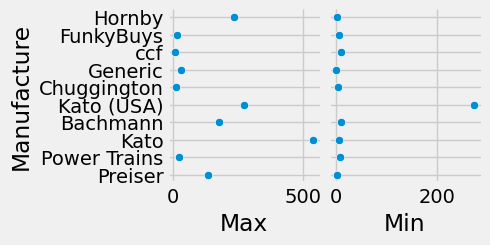

In [65]:
x=Range_Manufacturer.head(10)
sns.pairplot(x,y_vars='Manufacture')
plt.show()

(0.0, 400.0)

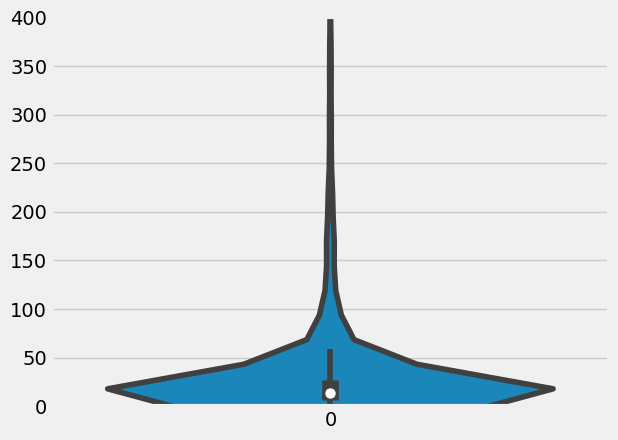

In [66]:
#Distribution of max and min
x=Range_Manufacturer
sns.violinplot(x['Max'])
plt.ylim(0,400)

(0.0, 200.0)

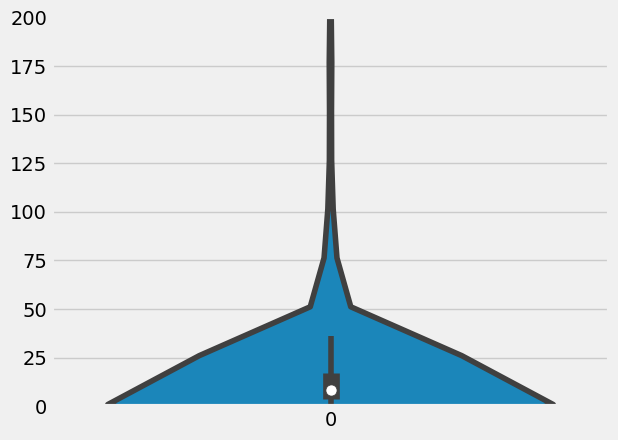

In [67]:
x=Range_Manufacturer
sns.violinplot(x['Min'])
plt.ylim(0,200)

In [68]:
Range_Manufacturer['Max'].describe()
Range_Manufacturer['Min'].describe()

count    2364.000000
mean       16.855360
std        57.470707
min         0.000000
25%         3.780000
50%         8.490000
75%        16.882500
max      2439.920000
Name: Min, dtype: float64

# Manufacturer vs Top 5 expensive product name  

In [69]:
List_1=manufacture['price'].value_counts().loc['Power Trains']

In [70]:
df['price']=df['price'].fillna('0')
df.loc[8,['price']]
df['price']=df['price'].astype(float)

In [71]:
Prices=[]
for i in List:
    List_3=[]
    List_2=manufacture['price'].value_counts().loc[i]
    for j,n in List_2.items():
        List_3.append(float(j))
    List_3.sort(reverse=True)    
    Prices.append(List_3)  
Prices[0]    

[235.58,
 169.99,
 166.04,
 141.23,
 139.99,
 139.95,
 129.95,
 127.99,
 126.2,
 121.05,
 119.99,
 119.5,
 116.1,
 114.98,
 108.99,
 107.99,
 105.0,
 98.5,
 94.46,
 89.99,
 82.31,
 79.95,
 74.99,
 69.99,
 69.93,
 65.76,
 63.99,
 60.25,
 58.92,
 58.64,
 51.53,
 49.99,
 43.51,
 41.67,
 39.99,
 39.95,
 39.1,
 36.95,
 32.19,
 30.99,
 29.99,
 28.99,
 27.99,
 27.49,
 24.99,
 21.95,
 19.99,
 19.95,
 18.99,
 18.69,
 18.12,
 13.46,
 5.7,
 3.42,
 3.19,
 3.03,
 2.35,
 0.0]

In [72]:
Final_Price=[]
for i in Prices :
    Temp=[]
    if len(i)>5:
        for j in range(0,5):
            Temp.append(i[j])
    else:
        for j in range(0,len(i)):
            Temp.append(i[j])
    Final_Price.append(Temp)
    Temp=[]
Final_Price[0]
        

[235.58, 169.99, 166.04, 141.23, 139.99]

In [73]:
df.set_index(keys=['price'],inplace=True)

In [74]:
product_name=df.loc[Final_Price[0][1],'product_name']
product_name

price
169.99    Hornby Gauge Flying Scotsman NRM 2015 Rededica...
169.99    LEGO Indiana Jones 7628 Peril In Peru Limited ...
169.99    Playmobil 4865 Knights Lion Knights Empire Castle
169.99    TMNT Monster Tower Playset ~ Teenage Mutant Ni...
Name: product_name, dtype: object

In [75]:
df['product_name']=df['product_name'].fillna('Unknown')

In [76]:

Costly_Products=[]
for i in Final_Price :
    Temp=[]
    if len(i)>5:
        for j in range(0,5):
            product_name=df.loc[i[j],'product_name']
            Temp.append(product_name)
            
    else:
        for j in range(0,len(i)):
            product_name=df.loc[i[j],'product_name']
            Temp.append(product_name)        
    Costly_Products.append(Temp)
    Temp=[]
   

In [77]:
Product_Name_Costly=pd.DataFrame({'Manufacturer':List,'Product_Names_of mostly':Costly_Products})
Product_Name_Costly

,Manufacturer,Product_Names_of mostly
0,Hornby,[Hornby Gauge Western Express Digital Train Se...
1,FunkyBuys,[[FunkyBuys® Large Christmas Holiday Express F...
2,ccf,[[CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ...
3,Generic,"[Rainbow 7M Huge Octopus Paul Parafoil Kite, [..."
4,Chuggington,[[Dapol Model Railway BR Mogul Class Locomotiv...
...,...,...
2647,Feldherr,[[Mini Beasts Sand Art Pictures (Pack of 20) (...
2648,GGS,[Marauder's map wallscroll - Harry Potter]
2649,Captain america,[Captain America - The First Avenger - Movie S...
2650,IronMan,[Iron Maiden 8-Inch Eddie 2 Mintutes To Midnig...


In [78]:
df.reset_index(inplace=True)

# Manufacturer vs Cost of Total stock in Euros

In [79]:
Dict=dict(manufacture['price'].value_counts().loc['Disney'])

    

In [80]:
Total_Income=[]
for i in List:
    Dict=dict(manufacture['price'].value_counts().loc[i])
    sum=0
    for key,index in Dict.items():
        sum=sum+float(key)*float(index)
    Total_Income.append(sum) 
Total_Income[0]    

4634.099999999997

In [81]:
Total_Income_Manufacturer=pd.DataFrame({'Manufacturer':List,'Total_Money_Earned in £':Total_Income})
Total_Income_Manufacturer.head(2)

,Manufacturer,Total_Money_Earned in £
0,Hornby,4634.10
1,FunkyBuys,22.98


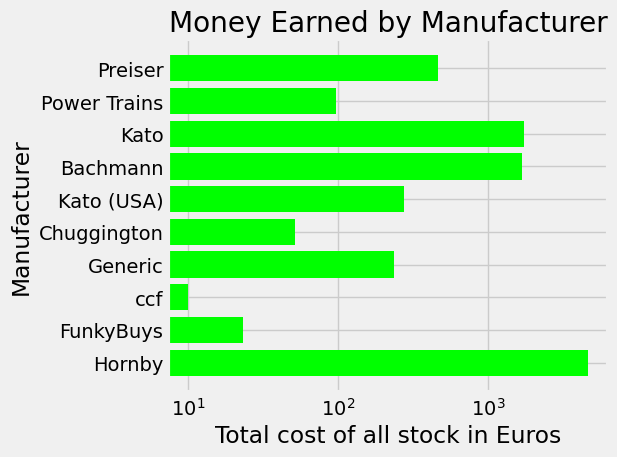

In [82]:
plt.barh(Total_Income_Manufacturer['Manufacturer'][:10],Total_Income_Manufacturer['Total_Money_Earned in £'][:10],linewidth=1,log=True,color='#00ff00')
plt.title('Money Earned by Manufacturer')
plt.xlabel('Total cost of all stock in Euros')
plt.ylabel('Manufacturer')
plt.tight_layout()

(0.0, 1000.0)

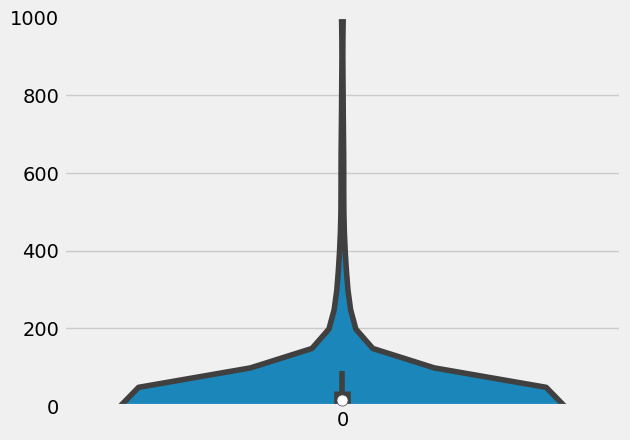

In [83]:
x=Total_Income_Manufacturer
sns.violinplot(x['Total_Money_Earned in £'])
plt.ylim(0,1000)

# Price vs Availablity of stocks

In [84]:
List_Price=df['price']
Price=df.groupby(['price'])
Temp=[]
for i in List_Price:
    Temp.append(Price['number_available_in_stock'].value_counts().loc[i].sum())

In [85]:
fd=pd.DataFrame({'Price':List_Price,'Available Stocks':Temp})
fd

,Price,Available Stocks
0,3.42,2
1,16.99,52
2,9.99,189
3,39.99,39
4,32.19,2
...,...,...
9999,22.95,9
10000,39.99,39
10001,43.99,7
10002,49.81,1


Text(0.5, 1.0, 'Availablity of product')

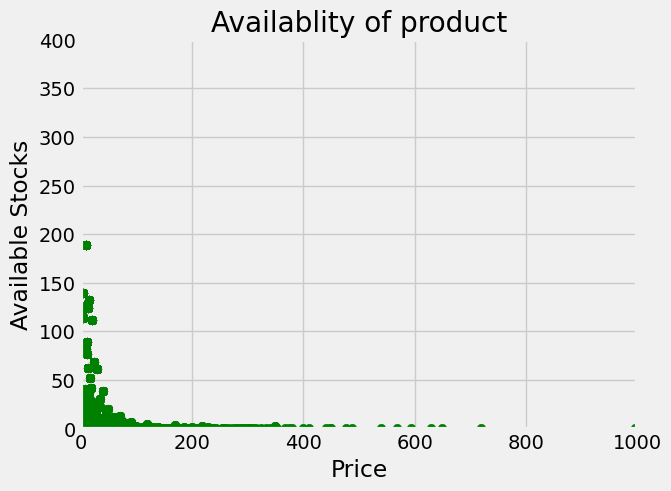

In [86]:
plt.scatter(fd['Price'],fd['Available Stocks'],alpha=1,color='green')
#plt.style.use('threefivetyeight')
plt.xlabel('Price')
plt.xlim(0,1000)
plt.ylim(0,400)
plt.ylabel('Available Stocks')
plt.title('Availablity of product')

# Rating vs no.of product

In [87]:
List_Rate=list(df['Rating'].unique())
List_Rate.sort()
Rate=df.groupby(['Rating'])
Temp=[]
for i in List_Rate:
     Temp.append(Rate['number_available_in_stock'].value_counts().loc[i].sum())
dff=pd.DataFrame({'Rating':List_Rate,'No of stocks':Temp})

        
    

Text(0.5, 1.0, 'Rating of Product')

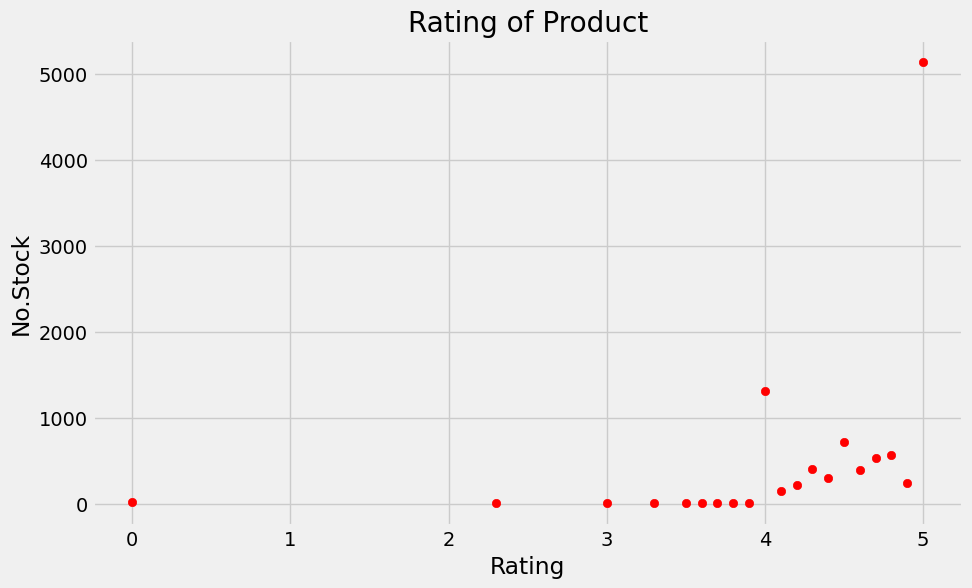

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(dff['Rating'],dff['No of stocks'],alpha=1,color='red')
#plt.style.use('threefivetyeight')
plt.xlabel('Rating')
plt.ylabel('No.Stock')
plt.title('Rating of Product')


# Making Simple Regression model of above DataFrame

In [89]:
dff['Rating']=dff['Rating'].astype(float)
x=dff.iloc[:,:-1].values
y=dff.iloc[:,-1].values

In [90]:
from sklearn.model_selection import train_test_split
X_trains,X_test,Y_trains,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [91]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_trains,Y_trains)

LinearRegression()

In [92]:
y_pred=regressor.predict(X_test)

Text(0.5, 1.0, 'Rating of Product')

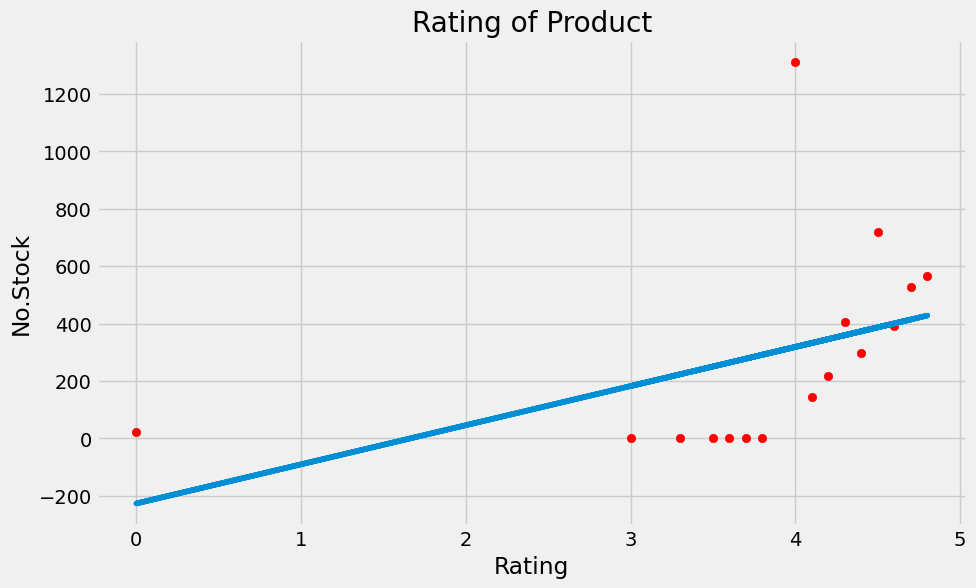

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(X_trains,Y_trains,color='red')
plt.plot(X_trains,regressor.predict(X_trains))    
#plt.style.use('threefivetyeight')
plt.xlabel('Rating')
plt.ylabel('No.Stock')
plt.title('Rating of Product')


In [94]:
fd=pd.DataFrame({'price':df['price'],'number_available_in_stock':df['number_available_in_stock'],'manufacturer':df['manufacturer'],'Rating':df['Rating']})
fd.head(5)

,price,number_available_in_stock,manufacturer,Rating
0,3.42,5.0,Hornby,4.9
1,16.99,0.0,FunkyBuys,4.5
2,9.99,2.0,ccf,3.9
3,39.99,0.0,Hornby,5.0
4,32.19,0.0,Hornby,4.7


# Multiple Regression for Rating as dependent and rest Independent

In [95]:
fd['price']=fd['price'].astype(float)
fd['number_available_in_stock']=fd['number_available_in_stock'].astype(float)
fd['Rating']=df['Rating'].astype(float)


In [96]:
x=fd.iloc[:,:-1].values
y=fd.iloc[:,-1].values
x.shape

(10004, 3)

In [97]:
#changing catogerial column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
                     

In [98]:
x

array(<10004x2654 sparse matrix of type '<class 'numpy.float64'>'
	with 26053 stored elements in Compressed Sparse Row format>, dtype=object)

In [99]:
#need to to convert sparse array into normal matrix
#if not done singleton array erroe occurs ...
from scipy.sparse import csr_matrix
sparse_matrix=csr_matrix(x.all())
x=sparse_matrix.toarray()

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)


In [101]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)


In [102]:
y_pred

array([ 4.61790791e+00, -1.73881174e+08,  4.71892136e+00, ...,
        4.95067677e+00,  4.64082041e+00,  4.59556967e+00])

In [103]:
#representing vectors y_pred and y_test into vertical column to comapare 
np.set_printoptions(precision=2)
a=np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
print(a)

[[ 4.62e+00  4.50e+00]
 [-1.74e+08  5.00e+00]
 [ 4.72e+00  5.00e+00]
 ...
 [ 4.95e+00  5.00e+00]
 [ 4.64e+00  5.00e+00]
 [ 4.60e+00  4.90e+00]]


# Polynomial Regression based of price vs No of items in stock prediction

In [104]:
fdd=pd.DataFrame({'Rating':dff['Rating'],'No of stocks':dff['No of stocks']})
fdd.head(2)


,Rating,No of stocks
0,0.0,22
1,2.3,1


In [105]:
x=fdd.iloc[:,:-1]#only price
y=fdd.iloc[:,-1]
y[0]

22

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
linear_regg=LinearRegression()
linear_regg.fit(x_poly,y)



LinearRegression()

Text(0.5, 1.0, 'Rating of Product')

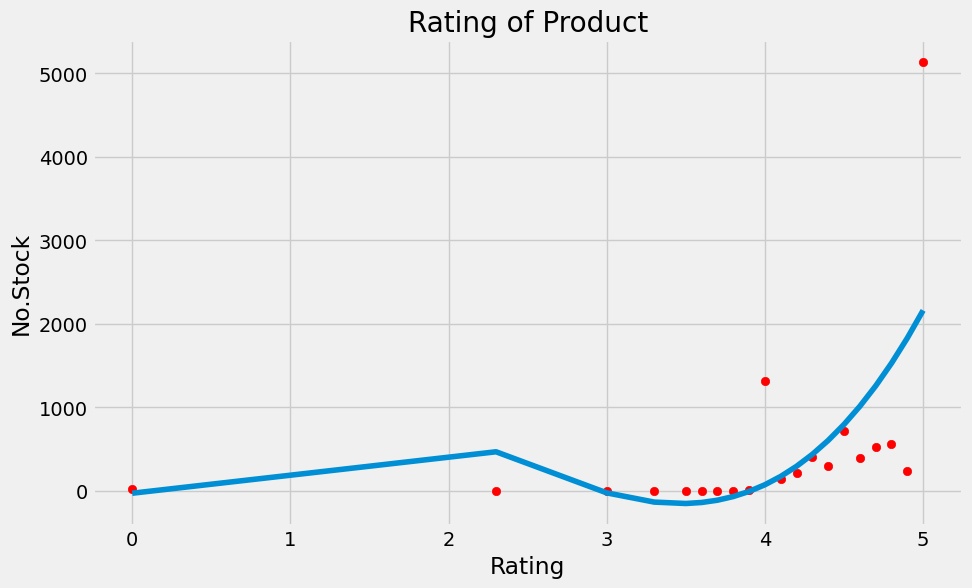

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='red')

plt.plot(x,linear_regg.predict(x_poly))    
#plt.style.use('threefivetyeight')
plt.xlabel('Rating')
plt.ylabel('No.Stock')
plt.title('Rating of Product')

In [108]:
# to predict a certain rating
linear_regg.predict(poly_reg.fit_transform([[4.3]]))

array([439.35])